In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
from datetime import date
from pandas.tseries.offsets import MonthBegin
import matplotlib.pyplot as plt

In [2]:
df_ETF = yf.download('0050.TW', start='2017-01-02')
df_bond = yf.download('00679B.TWO', start='2017-01-02')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
df_bond

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-11,39.998798,39.998798,39.998798,39.998798,39.998798,0
2017-01-12,39.790501,39.790501,39.790501,39.790501,39.790501,0
2017-01-13,39.560101,39.560101,39.560101,39.560101,39.560101,0
2017-01-17,39.700001,39.779999,39.509998,39.689999,39.689999,928000
2017-01-18,39.660000,39.720001,39.650002,39.650002,39.650002,601000
...,...,...,...,...,...,...
2022-04-08,37.130001,37.130001,37.000000,37.009998,37.009998,2156000
2022-04-11,36.599998,36.630001,36.400002,36.500000,36.500000,3440000
2022-04-12,36.060001,36.220001,36.000000,36.080002,36.080002,2651000


In [4]:
def cal_pay_profit(ETF_bond_ratio):
    prices_bond = df_bond['Open']
    prices_ETF = df_ETF['Open']

    pay_per_month = 2000    # NTD
    # ETF_bond_rate = 0.5
    hold_ETF = 0
    hold_bond = 0
    pay = 0
    today = date.today()
    previous_momth = '00'

    index = df_bond.index.strftime('%Y-%m-%d').tolist()

    for i in index:
        if(i[5:7] != previous_momth):
            previous_momth = i[5:7]
            hold_ETF += pay_per_month * ETF_bond_ratio/prices_ETF[i]
            hold_bond += pay_per_month * (1 - ETF_bond_ratio)/prices_bond[i]
            pay += pay_per_month


    profit = hold_ETF * prices_ETF[prices_ETF.index[-1]] + hold_bond * prices_bond[prices_bond.index[-1]]


    return pay, profit

In [5]:
years = int(df_bond.index.strftime('%Y-%m-%d')[-1][:4]) - int(df_bond.index.strftime('%Y-%m-%d')[0][:4])

In [6]:
cal_pay_profit(0.9)

(128000, 180535.26261108005)

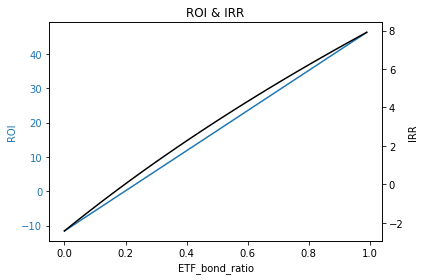

In [7]:
pays = []
profits = []
ROI = []
IRR = []
ax = []
step = 0.01

for i in range(int(1.0/step)):
    pay, profit = cal_pay_profit(i*step)
    pays.append(pay)
    profits.append(profit)
    ROI.append((profit-pay)*100/pay)
    IRR.append(((profit/pay)**(1/years)-1)*100)
    ax.append(i*step)


fig, ax1 = plt.subplots()
plt.title('ROI & IRR')
plt.xlabel('ETF_bond_ratio')
ax2 = ax1.twinx()

ax1.set_ylabel('ROI', color='tab:blue')
ax1.plot(ax, ROI, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2.set_ylabel('IRR', color='black')
ax2.plot(ax, IRR, color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()
plt.show()

In [8]:
print("Cost:  ", pay, "NTD")
print("Value: ", profit, "NTD")
print("ROI: ", (profit-pay)*100/pay, '%')
print("IRR: ", ((profit/pay)**(1/years)-1)*100,'%')


Cost:   128000 NTD
Value:  187266.20140605402 NTD
ROI:  46.301719848479706 %
IRR:  7.907066520764006 %
